# 线性回归
### 回归模型
$y=w_1x_1+w_2x_2+…+w_nx_n+b=[w_0 w_1 w_2 … w_n] \begin{bmatrix}x_0 \\ x_1\\ … \\ x_n\end{bmatrix}+b$
### 损失函数
$L = \frac{1}{2}(y-\hat y)^2$

In [1]:
# 线性回归 + Python + 梯度下降法

import numpy as np
import matplotlib.pyplot as plt

x = np.array([[1, 5.56], [2, 5.70], [3, 5.91], [4, 6.40],[5, 6.80],
              [6, 7.05], [7, 8.90], [8, 8.70],[9, 9.00], [10, 9.05]])
m, n = np.shape(x)
x_data = np.ones((m, n))
x_data[:, :-1] = x[:, :-1]
y_data = x[:, -1]
m, n = np.shape(x_data)
theta = np.ones(n)

在线性回归模型中，梯度计算用于找到损失函数（通常是均方误差）相对于模型参数的导数。这个导数告诉我们损失函数在参数空间中的变化方向和幅度，从而指导我们如何调整参数以减小损失。

对于线性回归模型 $y = Xw$，其中 $X$ 是特征矩阵，$w$ 是参数向量，损失函数（均方误差）可以表示为：

$$L(w) = \frac{1}{2m} \sum_{i=1}^{m} (Xw - y)^2$$

我们需要计算损失函数 $L(w)$ 相对于参数向量 $w$ 的梯度，即 $\nabla_w L(w)$。通过求导，我们可以得到：

$$\nabla_w L(w) = \frac{1}{m} X^T (Xw - y)$$

其中 $X^T$ 是 $X$ 的转置。在代码中，`x_train` 对应于 $X^T$，`loss` 对应于 $Xw - y$（即预测值与实际值之间的差异），因此 `np.dot(x_train, loss)` 就是计算 $X^T (Xw - y)$。最后，我们除以样本数量 $m$ 来求平均梯度，即 `gradient = np.dot(x_train, loss) / m`。

这个梯度向量指示了在参数空间中损失函数下降最快的方向，因此在梯度下降算法中，我们沿着这个方向更新参数以减小损失。


findfont: Font family ['Arial Unicode MS'] not found. Falling back to DejaVu Sans.


findfont: Font family ['Arial Unicode MS'] not found. Falling back to DejaVu Sans.


第0次梯度下降损失为: 158.94
第100次梯度下降损失为: 106.98
第200次梯度下降损失为: 72.86
第300次梯度下降损失为: 50.45
第400次梯度下降损失为: 35.74
第500次梯度下降损失为: 26.07
第600次梯度下降损失为: 19.72
第700次梯度下降损失为: 15.55
第800次梯度下降损失为: 12.81
第900次梯度下降损失为: 11.01
第1000次梯度下降损失为: 9.83
第1100次梯度下降损失为: 9.06
第1200次梯度下降损失为: 8.55
第1300次梯度下降损失为: 8.21
第1400次梯度下降损失为: 7.99
第1500次梯度下降损失为: 7.85
第1600次梯度下降损失为: 7.75
第1700次梯度下降损失为: 7.69
第1800次梯度下降损失为: 7.65
第1900次梯度下降损失为: 7.62
线性回归模型 w:  [0.46995918 4.7104124 ]


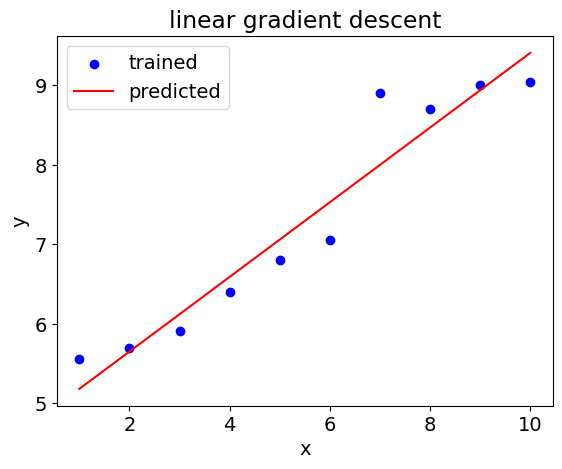

In [2]:
def gradientDescent(iter, x, y, w, alpha):
    x_train = x.transpose()
    for i in range(0, iter):
        pre = np.dot(x, w)
        loss = (pre - y)
        gradient = np.dot(x_train, loss) / m
        w = w - alpha * gradient
        cost = 1.0 / 2 * m * np.sum(np.square(np.dot(x, np.transpose(w)) - y))
        if i%100 == 0:
            print("第{}次梯度下降损失为: {}".format(i,round(cost,2)))
    return w

result = gradientDescent(2000, x_data, y_data, theta, 0.01)
y_pre = np.dot(x_data, result)
print("线性回归模型 w: ", result)

plt.rc('font', family='Arial Unicode MS', size=14)
plt.scatter(x[:, 0], x[:, 1], color='b', label='trained')
plt.plot(x[:, 0], y_pre, color='r', label='predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.title('linear gradient descent')
plt.legend()
plt.show()